In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
dataCA = pd.read_csv('./data/CAvideos.csv')
# dataDE = pd.read_csv('./data/DEvideos.csv')
# dataFR = pd.read_csv('./data/FRvideos.csv')
# dataGB = pd.read_csv('./data/GBvideos.csv')
# dataIN = pd.read_csv('./data/INvideos.csv')
# dataJP = pd.read_csv('./data/JPvideos.csv')
# dataKR = pd.read_csv('./data/KRvideos.csv')
# dataMX = pd.read_csv('./data/MXvideos.csv')
# dataRU = pd.read_csv('./data/RUvideos.csv')
# dataUS = pd.read_csv('./data/USvideos.csv')

# Plan

## Data Analysis Ideas

- Check which videos were trending for long periods of time - was the same video on trending for multiple days? (Done)

- How many of these are music videos? (Done)

- which categories are most trending? (Done)



## Machine Learning Ideas

- Tell me how many videos from this channel will be selected as trending videos next week. 
- Tell me which channel is most popular in category 1 next month.
- how likely is a video to go viral because of it's title in different countries, or, one I like better as a data science project,
- What genre is likely to go trending in different countries
- Sentiment Analysis on description to identify what ideas are popular in different areas?





In [3]:
cat_ids = pd.read_json('./data/CA_category_id.json')['items']
ids = [(k, d['snippet']['title']) for k, d in enumerate(cat_ids)]

In [4]:
from datetime import datetime

dataCA['trending_date'] = pd.to_datetime(dataCA['trending_date'], format="%y.%d.%m")
dataCA['publish_time'] = pd.to_datetime(dataCA['publish_time'], format="%Y-%m-%d").dt.date

In [12]:
top_view_idx = dataCA.groupby(['trending_date'])['views'].transform(max) == dataCA['views']
top_view_df = dataCA[top_view_idx]

In [13]:
range = pd.date_range('2017-12-05', '2017-12-12', periods=2)
top_view_df[(top_view_df['trending_date'] > range[0]) & (top_view_df['trending_date'] < range[1] )]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
4451,6ZfuNTqbHE8,2017-12-06,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",87450245,2584675,52176,341571,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
4699,6ZfuNTqbHE8,2017-12-07,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",89930713,2606665,53011,347982,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
4795,FlsCjmMhFmw,2017-12-08,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",52611730,1891822,884963,702784,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
4996,FlsCjmMhFmw,2017-12-09,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",75969469,2251826,1127811,827755,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
5197,FlsCjmMhFmw,2017-12-10,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",100911567,2656678,1353655,682890,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
5398,FlsCjmMhFmw,2017-12-11,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",113876217,2811217,1470387,787174,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."


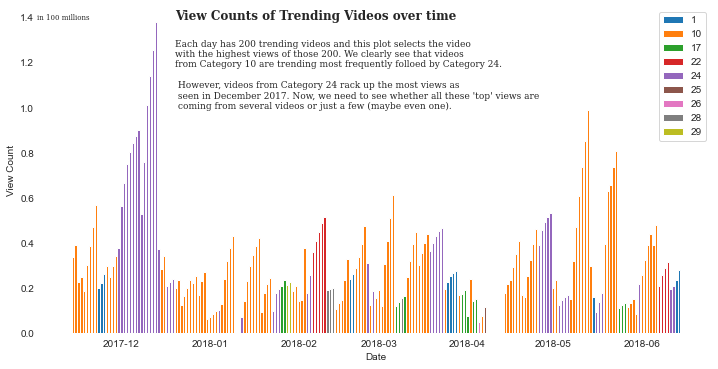

In [14]:
# plot highest views by date. Also by category to see which categories have highest views

sns.set_style('white')
# sns.despine()


vis_df = pd.DataFrame(dict(x=top_view_df['trending_date'], y=top_view_df['views'], label=top_view_df['category_id']))
groups = vis_df.groupby('label')

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.bar(group.x, group.y, label=name)
ax.legend()

ax.set_xlabel("Date")
ax.set_ylabel("View Count")
ax.yaxis.offsetText.set_visible(False)
fig.text(0.12, 0.85, 'in 100 millions', fontsize=7, fontfamily='serif')


ax.grid(False)
for s in ['top', 'right', 'bottom', 'left']:
    ax.spines[s].set_visible(False)

fig.text(0.28, 0.85, 'View Counts of Trending Videos over time', fontsize=12, fontweight='bold', fontfamily='serif')
fig.text(0.28, 0.62, 
'''Each day has 200 trending videos and this plot selects the video 
with the highest views of those 200. We clearly see that videos 
from Category 10 are trending most frequently folloed by Category 24.

 However, videos from Category 24 rack up the most views as 
 seen in December 2017. Now, we need to see whether all these 'top' views are 
 coming from several videos or just a few (maybe even one).
'''

, fontsize=9, fontweight='light', fontfamily='serif')


plt.show()

In [15]:
count_group = top_view_df.groupby(['video_id']).agg('count')
long_vids = count_group[count_group['trending_date'] >= 5].reset_index()['video_id']

xposition = []
for vid in long_vids:
    xposition.append((list(top_view_df[top_view_df['video_id'] == vid]['trending_date'])[-1]))

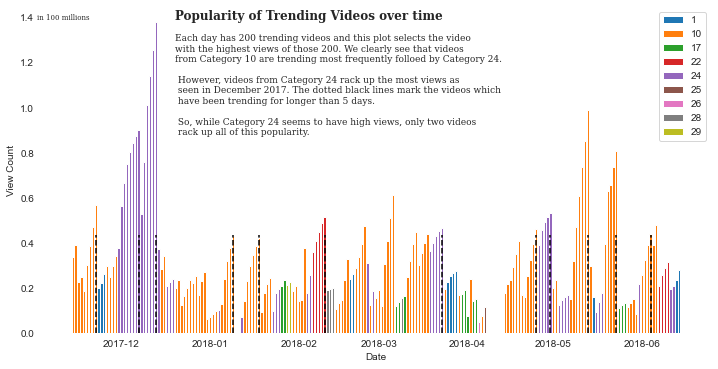

In [16]:
# Let's take the plot and add lines for videos that stay popular for longer than 5 days


sns.set_style('white')
# sns.despine()

vis_df = pd.DataFrame(dict(x=top_view_df['trending_date'], y=top_view_df['views'], label=top_view_df['category_id']))
groups = vis_df.groupby('label')

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.bar(group.x, group.y, label=name)
ax.legend()
ax.set_xlabel("Date")
ax.set_ylabel("View Count")
ax.yaxis.offsetText.set_visible(False)
fig.text(0.12, 0.85, 'in 100 millions', fontsize=7, fontfamily='serif')

for xc in xposition:
    plt.axvline(x=xc, color='k', linestyle='dashed', ymin=0, ymax=0.3)


ax.grid(False)
for s in ['top', 'right', 'bottom', 'left']:
    ax.spines[s].set_visible(False)

fig.text(0.28, 0.85, 'Popularity of Trending Videos over time', fontsize=12, fontweight='bold', fontfamily='serif')
fig.text(0.28, 0.56, 
'''Each day has 200 trending videos and this plot selects the video 
with the highest views of those 200. We clearly see that videos 
from Category 10 are trending most frequently folloed by Category 24.

 However, videos from Category 24 rack up the most views as 
 seen in December 2017. The dotted black lines mark the videos which 
 have been trending for longer than 5 days.

 So, while Category 24 seems to have high views, only two videos 
 rack up all of this popularity.
'''

, fontsize=9, fontweight='light', fontfamily='serif')


plt.show()

In [17]:
top_view_df.groupby(['category_id']).agg('count')

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
category_id,,,,,,,,,,,,,,,
1,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
10,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116
17,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
22,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
24,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47
25,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
26,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
28,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
29,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [91]:
order = top_view_df.groupby('category_id')['likes', 'dislikes'].sum().reset_index().set_index('category_id').T
display(order)
order = order/order.sum()
order.columns = order.columns.astype(str)

<ipython-input-91-ede5488f1777>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  order = top_view_df.groupby('category_id')['likes', 'dislikes'].sum().reset_index().set_index('category_id').T


category_id,1,10,17,22,24,25,26,28,29
likes,5369328,142137339,6025341,7130343,55208848,47780,277144,1161551,3787596
dislikes,221319,6106622,147248,342440,9205055,13182,17515,66531,896850


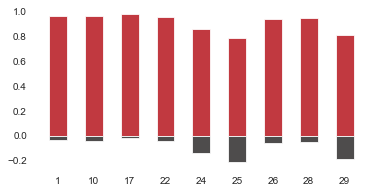

In [19]:
like = order.loc['likes']
dislike = - order.loc['dislikes']



fig, ax = plt.subplots(1,1, figsize=(6, 3))

sns.set_style('white')

ax.grid(False)
for s in ['top', 'right', 'bottom', 'left']:
    ax.spines[s].set_visible(False)

ax.bar(like.index, like, width=0.5, color='#b20710', alpha=0.8, label='Likes')
ax.bar(dislike.index, dislike, width=0.5, color='#221f1f', alpha=0.8, label='Dislikes')

plt.show()

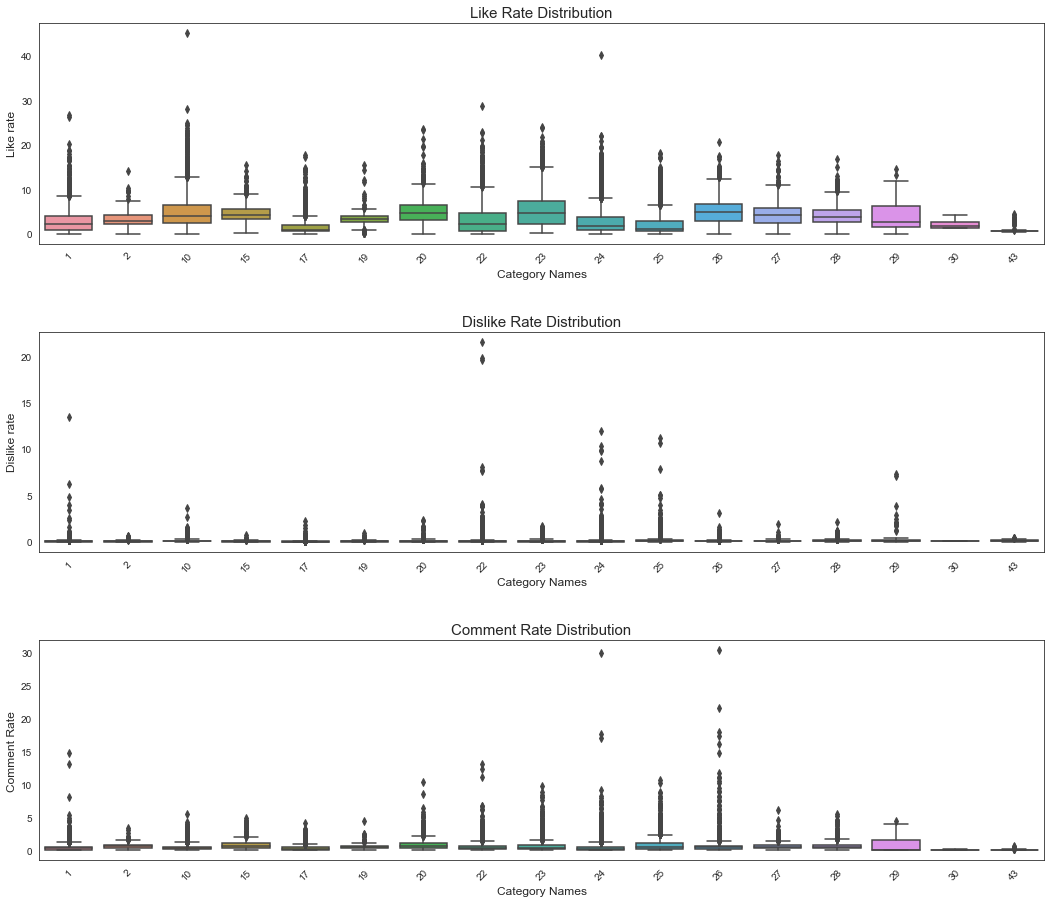

In [88]:
# Engagement Rate 

dataCA['like_rate'] =  dataCA ['likes'] / dataCA['views'] * 100
dataCA['dislike_rate'] =  dataCA ['dislikes'] / dataCA['views'] * 100
dataCA['comment_rate'] =  dataCA ['comment_count'] / dataCA['views'] * 100

plt.figure(figsize = (18,15))

plt.subplot(311)
g= sns.boxplot(x='category_id',y='like_rate',  data=dataCA)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Like Rate Distribution", fontsize=15)
g.set_xlabel("Category Names", fontsize=12)
g.set_ylabel("Like rate", fontsize=12)

plt.subplot(312)
g1= sns.boxplot(y='dislike_rate', x='category_id', data=dataCA)
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Dislike Rate Distribution", fontsize=15)
g1.set_xlabel("Category Names", fontsize=12)
g1.set_ylabel("Dislike rate", fontsize=12)

plt.subplot(313)
g2= sns.boxplot(y='comment_rate', x='category_id', data=dataCA)
g2.set_xticklabels(g.get_xticklabels(),rotation=45)
g2.set_title("Comment Rate Distribution", fontsize=15)
g2.set_xlabel("Category Names", fontsize=12)
g2.set_ylabel("Comment Rate", fontsize=12)

sns.set_style('white')

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

In [32]:
# Videos that stay on Trending the longest. 
# Common characteristics?
# How have their featurs changed over time?

# Gap between release and trending in different countries?

In [118]:
count_group_all = dataCA.groupby(['video_id']).agg('count')
long_vids_all = count_group_all[count_group_all['trending_date'] == 8].reset_index()['video_id']

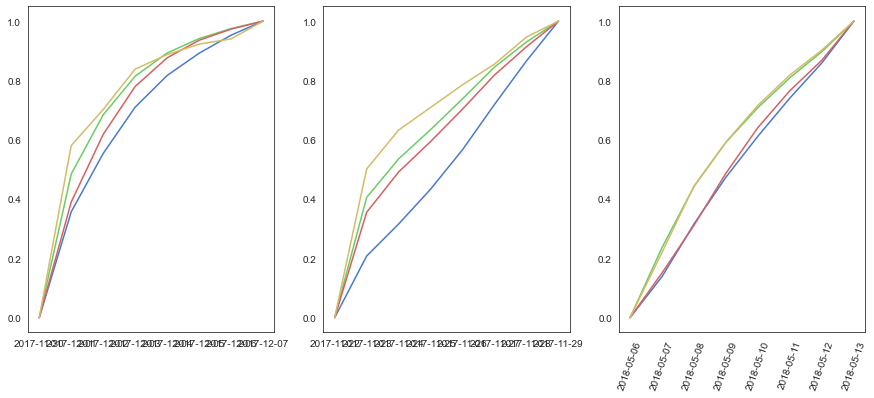

In [166]:
sns.set_style('white')
sns.set_color_codes("muted")


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fig, ax = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k')
def data_setup(vid):
    vis_dat = dataCA[dataCA['video_id'] == vid][['trending_date', 'views', 'likes', 'dislikes', 'comment_count']]
    dates = vis_dat['trending_date']
    vis_dat = vis_dat.drop(['trending_date'], axis=1)
    vis_dat -= vis_dat.min()
    vis_dat /= vis_dat.max()
    vis_dat['trending_date'] = dates
    vis_dat.set_index('trending_date')
    vis_dat.columns = vis_dat.columns.astype(str)
    return vis_dat

values = [0, 1, 2] # weird bug in python. 'range' Function is not working on my machine
for i in values:
    vid = long_vids_all[i]
    vis_dat = data_setup(vid)
    ax[i].plot(vis_dat['trending_date'],vis_dat['views'], color='b', label='Views')
    ax[i].plot(vis_dat['trending_date'],vis_dat['likes'], color='g', label='Likes')
    ax[i].plot(vis_dat['trending_date'],vis_dat['dislikes'], color='r', label='Dislikes')
    ax[i].plot(vis_dat['trending_date'],vis_dat['comment_count'], color='y', label='Comments')
plt.xticks(rotation=70)
plt.show()
    
